In [1]:
##########################
# Loading relevant modules
###########################
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
from matplotlib import pyplot

In [2]:
########################
# Location of log file
########################
csv_filename = '/home/shaukat/Shaukat/data_repository/financial_sector/paysim1/PS_20174392719_1491204439457_log.csv'
# Loading csv into Pandas Dataframe
df = pd.read_csv(csv_filename)

####################################################################
# Getting Dataframe Dimensions (6362620 transactions, 11 features)
##################################################################
tot_transactions = df.shape[0]
tot_feats = df.shape[1]
print('Total Transactions: {} \nTotal Features:{}'.format(tot_transactions, tot_feats))
print('*'*25)
print('Feature Names: {}'.format(df.columns.to_list()))
print('*'*25)


Total Transactions: 6362620 
Total Features:11
*************************
Feature Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
*************************


# Visualizing Data

In [3]:
# Visualize first 5 rows 
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Printing unique types of transactions
print('Transaction Type: {}'.format(df.type.unique()))

Transaction Type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [5]:
# Lets find out unique Customers/Merchants who originated and received amount
name_org = list(df.nameOrig.unique())
nameDest = list(df.nameDest.unique())
#print(type(name_org), len(name_org))
#print(type(nameDest), len(nameDest))
print('Number of unique customers initializing transactions: {}'.format(len(name_org)))
print('Number of unique customers on recepient side: {}'.format(len(nameDest)))

Number of unique customers initializing transactions: 6353307
Number of unique customers on recepient side: 2722362


In [6]:
# When isFraud = 1, transactions are labelled as Fraudulent, lets find their total proportion
df_isfraud = df.loc[df.isFraud == 1]

# Visualize first 5 rows
df_isfraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [7]:
# The dataset is highly skewed or imbalanced, as only 0.12% of transactions are labeled as positive
# 
tot_fraud_trans = df_isfraud.shape[0]
print('Total Transactions: {}'.format(tot_transactions))
print('Total fraudulent transactions: {}'.format(tot_fraud_trans))
print('Percentage fraudulent transactions: {}'.format( (tot_fraud_trans/tot_transactions) * 100.0 ) )
print('Percentage normal transactions: {}'.format( 100.0 - ( (tot_fraud_trans/tot_transactions) * 100.0 ) ) )

Total Transactions: 6362620
Total fraudulent transactions: 8213
Percentage fraudulent transactions: 0.12908204481801522
Percentage normal transactions: 99.87091795518198


In [8]:
# lets plot the network where C553264065 receives amount from different customers
df_nxExample = df.loc[df.nameDest == 'C553264065']

# Create Graph 
nx_graph = nx.Graph()
for iter_row in df_nxExample.iterrows():
    source_node = iter_row[1]['nameOrig']
    dest_node = iter_row[1]['nameDest']
    #print(source_node, dest_node)
    edge = (source_node, dest_node)
    nx_graph.add_edge(*edge)

In [9]:
# df_nxExample is the dataframe that lists all transaction where recepient was C553264065
df_nxExample.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
6167,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0
7903,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0
16381,8,CASH_OUT,111622.39,C1457214570,2347.00,0.00,C553264065,99729.44,5254.44,0,0
20003,8,CASH_IN,206097.39,C161724858,1991.12,208088.52,C553264065,211351.84,5254.44,0,0


/home/shaukat/anaconda3/envs/ml/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


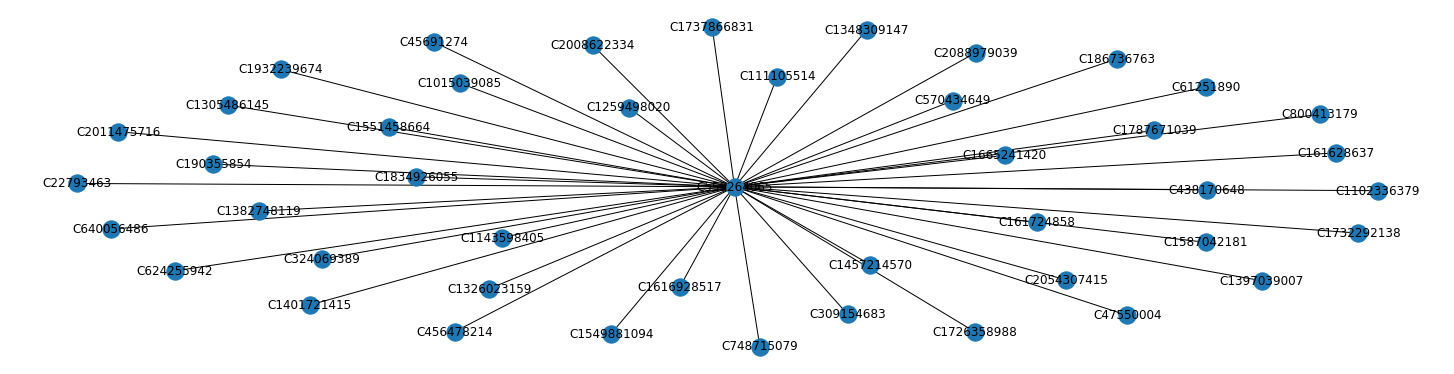

In [10]:
plt.rcParams["figure.figsize"] = (20,5)

##########################################
# All customers connected to C553264065
##########################################
nx.draw(nx_graph, with_labels=True)

# Datapreparation for model learning

In [11]:
# Preparing Dataset for training and testing purpose

# Creating a copy of df
df_ml = df.copy(deep=True)

# Introducing dummy variables to handle categorical values
# Dummy variables will be marked as "type_*"
df_ml = pd.get_dummies(df_ml, columns=['type'])

In [12]:
# Visualize first 5 rows
df_ml.head(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [13]:
# Printing column names
print('Feature Names: {}'.format(df_ml.columns.to_list()))

# Dropping columns
df_ml.drop('step', axis=1, inplace=True)
df_ml.drop('nameOrig', axis=1, inplace=True)
df_ml.drop('nameDest', axis=1, inplace=True)


Feature Names: ['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [14]:
df_ml.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [15]:
print('Remaining Feature Names: {}'.format(df_ml.columns.to_list()))

Remaining Feature Names: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [16]:
# Create a copy of Features and Label Dataframe
##################################################
# Make sure 'isFraud' is not a part of data columns
# 'isFlaggedFraud' can be a part of data columns and are those transactions where transfer is made for more than 200.00
select_dataCols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
select_label = ['isFraud']

# Slicing X and Y, and creating a deep copy
df_X = df_ml[select_dataCols].copy(deep=True)
df_Y = df_ml[select_label].copy(deep=True)

In [17]:
df_X.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [18]:
df_Y.head(5)

,isFraud
0,0
1,0
2,1
3,1
4,0


In [19]:
print(df_X.to_numpy().shape)

(6362620, 11)


In [20]:
print(df_Y.to_numpy().shape)

(6362620, 1)


In [21]:
# Creating 70-30 test train split (random split)
X_train, X_test, y_train, y_test = train_test_split(df_X.to_numpy(), df_Y.to_numpy(), test_size=0.30, random_state=np.random.RandomState())
print('X_train: {} y_train: {}'.format(X_train.shape, y_train.shape))
print('X_test: {} y_test: {}'.format(X_test.shape, y_test.shape))

X_train: (4453834, 11) y_train: (4453834, 1)
X_test: (1908786, 11) y_test: (1908786, 1)


In [22]:
#########################################
# A very simple Logistic regression model
#########################################
clf_lr = LogisticRegression(solver='lbfgs')
#clf_lr = clf_lr.fit(X_train, y_train.ravel())
clf_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Printing sum of fraudulent transactions in train and test set
print(sum(y_train.ravel()), sum(y_test.ravel()) )

5779 2434


# Model Evaluation

In [24]:
# Get F1-Score on training and Test set
########################################

# Getting Train prediction
pred_train = clf_lr.predict(X_train)

# Getting Test prediction
pred_test = clf_lr.predict(X_test)

In [25]:
# Training F1-score
[prec, rec, f_beta, support] = precision_recall_fscore_support(y_train.ravel(), pred_train, average='binary', pos_label=1)
f1_recalculated = (2*prec*rec)/(prec + rec)
print('(FROM SCIKIT) precision = %f , recall = %f , f_beta = %f f_score_recalculated = %f' %(prec,rec,f_beta, f1_recalculated))

# Get confusion matrix
# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
tn, fp, fn, tp = confusion_matrix(y_train.ravel(), pred_train).ravel()
print('tn:{} fp:{} fn:{} tp:{}'.format(tn, fp, fn, tp))

(FROM SCIKIT) precision = 0.297074 , recall = 0.785430 , f_beta = 0.431095 f_score_recalculated = 0.431095
tn:4437315 fp:10740 fn:1240 tp:4539


In [26]:
# Test F1-score
[prec, rec, f_beta, support] = precision_recall_fscore_support(y_test.ravel(), pred_test, average='binary', pos_label=1)
f1_recalculated = (2*prec*rec)/(prec + rec)
print('(FROM SCIKIT) precision = %f , recall = %f , f_beta = %f f_score_recalculated = %f' %(prec,rec,f_beta, f1_recalculated))

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test.ravel(), pred_test).ravel()
print('tn:{} fp:{} fn:{} tp:{}'.format(tn, fp, fn, tp))

(FROM SCIKIT) precision = 0.292057 , recall = 0.781019 , f_beta = 0.425137 f_score_recalculated = 0.425137
tn:1901744 fp:4608 fn:533 tp:1901


(1908786, 2)
(20055,) (20055,) (20055,)
Area under the curve: 0.96248


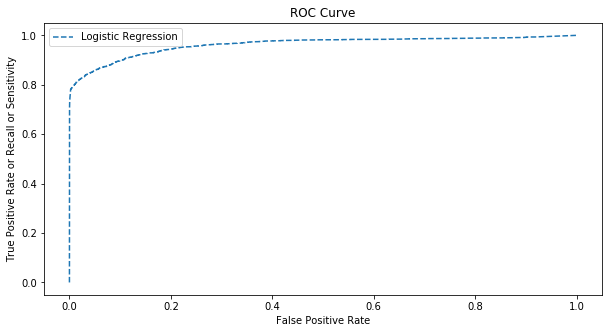

In [27]:
#########################
# ROC curve for TEST set
#########################
pred_test_prob = clf_lr.predict_proba(X_test)
print(pred_test_prob.shape)

# Get positive prob only
positive_prob = pred_test_prob[:,1]

# roc curve
fpr, tpr, thresholds = roc_curve(y_test.ravel(), positive_prob)
print(fpr.shape, tpr.shape, thresholds.shape)

# calculate AUC
roc_auc = roc_auc_score(y_test.ravel(), positive_prob)
print('Area under the curve: %.5f' % roc_auc)

# plot the roc curve for the model
plt.rcParams["figure.figsize"] = (10,5)
pyplot.plot(fpr, tpr, linestyle = '--', label='Logistic Regression')
# axis labels
pyplot.title('ROC Curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate or Recall or Sensitivity')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

f1_recalculated: 0.42513697864251376, auc:0.7438202866049982


/home/shaukat/anaconda3/envs/ml/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


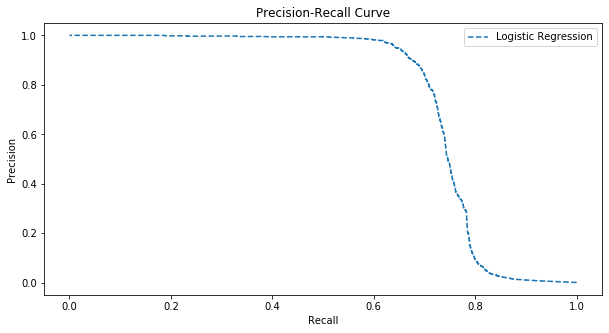

In [28]:
#####################################################################################
# Since we have a highly imbalanced Dataset, Precision-recall curve is more suitable
######################################################################################

precision, recall, thresholds = precision_recall_curve(y_test.ravel(), positive_prob)
f1_recalculated = f1_score(y_test.ravel(), pred_test)
prec_rec_auc = auc(recall, precision)
print('f1_recalculated: {}, auc:{}'.format(f1_recalculated, prec_rec_auc))

# print(type(precision), precision.shape, recall.shape, thresholds.shape)

pyplot.plot(recall, precision, linestyle = '--', label='Logistic Regression')
# axis labels
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Way Forward


Since we have highly imbalanced dataset, we shoud look into AUC scores for Precision-Recall curve (very well explained at: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).


We should do the following to improve the model predictions (these are few suggestions only, there are other ways for improvement):


- Get the results from dummy and random model. Are we really doing better than predicting random or majority class, this step will provide more insights. Find out F1 score while using the dummy and random model, then improve from there.


- Scale train dataset, and then apply the transformation on test set. There are several transformations available in Python.


- Try different classification algorithms: SVR, NN, deep learning models (need to see their effect on imbalanced dataset) etc


- Try statistical models to estimate the probability of fraudaulent transactions (Naive Bayes for example)


- Analyze the dataset to fetch more meaningful insights (NetworkX may help)


- Find out duplicated entries in the dataset, there are spurious transactions which are not flagged as "fraudulent" despite exceeding 200.0.

- Find out what proportion of "type" categories (CASH, DEBIT, TRANSFER etc) are labelled as "FRAUD". We can also recalculate "NewBalance" to offset the difference present in the dataset. 


These are few suggestions only. The major concern with Financial datasets is the privacy of customer, that's why getting real world dataset remains a key challenge for majority of practitioners and researchers.

